In [4]:
%pip install scikit-learn
%pip install libsvm

Note: you may need to restart the kernel to use updated packages.



In [5]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from libsvm import svmutil
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC

c:\Users\ACER\anaconda3\Lib\site-packages\libsvm\svm.py:148: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit


In [6]:
mnist = fetch_openml('mnist_784', parser='auto')


In [7]:
# Please read MNIST dataset description
# It may help you to understand the dataset
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [8]:
# Inpsect dataset keys
# It may help you to understand the dataset structure
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [9]:
print(mnist.data)

       pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0           0       0       0       0       0       0       0       0       0   
1           0       0       0       0       0       0       0       0       0   
2           0       0       0       0       0       0       0       0       0   
3           0       0       0       0       0       0       0       0       0   
4           0       0       0       0       0       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
69995       0       0       0       0       0       0       0       0       0   
69996       0       0       0       0       0       0       0       0       0   
69997       0       0       0       0       0       0       0       0       0   
69998       0       0       0       0       0       0       0       0       0   
69999       0       0       0       0       0       0       0       0       0   

       pixel10  ...  pixel7

In [10]:
digit_counts = np.bincount(mnist.target.astype(int))

for digit, count in enumerate(digit_counts):
    print(f"Jumlah data sampel untuk digit {digit}: {count}")

Jumlah data sampel untuk digit 0: 6903
Jumlah data sampel untuk digit 1: 7877
Jumlah data sampel untuk digit 2: 6990
Jumlah data sampel untuk digit 3: 7141
Jumlah data sampel untuk digit 4: 6824
Jumlah data sampel untuk digit 5: 6313
Jumlah data sampel untuk digit 6: 6876
Jumlah data sampel untuk digit 7: 7293
Jumlah data sampel untuk digit 8: 6825
Jumlah data sampel untuk digit 9: 6958


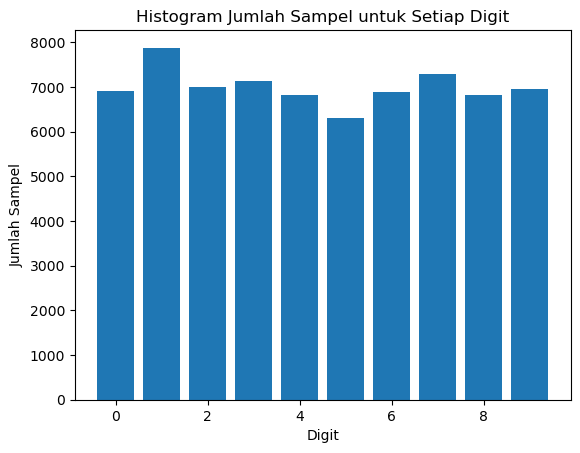

In [11]:
digits = list(range(10))

plt.bar(digits, digit_counts)
plt.xlabel('Digit')
plt.ylabel('Jumlah Sampel')
plt.title('Histogram Jumlah Sampel untuk Setiap Digit')
plt.show()

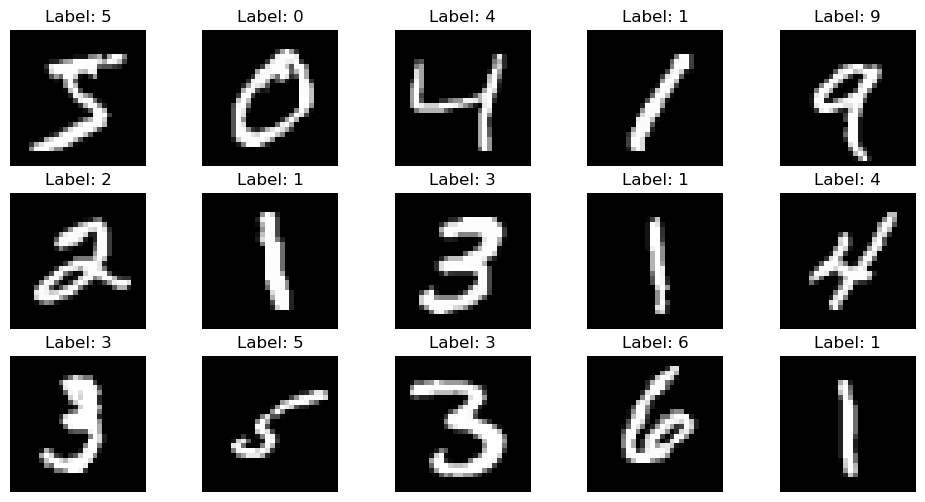

In [12]:
# Langkah 2: Menampilkan 15 Gambar Pertama dari Dataset
images = mnist.data[:15]  # Mengambil 15 gambar pertama
labels = mnist.target[:15]  # Mengambil label untuk 15 gambar pertama

# Menampilkan gambar dan labelnya
plt.figure(figsize=(12, 6))
for i in range(15):
    image = images.iloc[i].values.reshape(28, 28)  # Mengubah gambar ke bentuk 28x28
    plt.subplot(3, 5, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f"Label: {labels.iloc[i]}")
    plt.axis('off')

plt.show()

In [13]:
# Langkah 3: Ekstraksi Fitur pada Data MNIST (Menggunakan Nilai Piksel Asli)
X = mnist.data  # Data gambar (nilai piksel asli) sebagai fitur
y = mnist.target  # Label

# Cek dimensi data
print("Dimensi X (fitur):", X.shape)
print("Dimensi y (label):", y.shape)

Dimensi X (fitur): (70000, 784)
Dimensi y (label): (70000,)


PUNYA SEP + IA

In [14]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Original pixel values as features
X_original = mnist.data.astype(float)

# Perform PCA for feature extraction
n_components = 50  # Number of components to retain (you can adjust this)
pca = PCA(n_components=n_components, random_state=42)

# Standardize the data before applying PCA
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X_original)

# Fit PCA to the standardized data
X_pca = pca.fit_transform(X_standardized)

In [15]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets with different ratios
ratios = [0.7, 0.8, 0.9]  # 70:30, 80:20, 90:10 ratios

for ratio in ratios:
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - ratio, random_state=42)

    # Print the shapes of the resulting datasets
    print(f"Ratio {int(ratio * 100)}:{int((1 - ratio) * 100)}")
    print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
    print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")
    print()


Ratio 70:30
X_train shape: (48999, 784), y_train shape: (48999,)
X_test shape: (21001, 784), y_test shape: (21001,)

Ratio 80:19
X_train shape: (56000, 784), y_train shape: (56000,)
X_test shape: (14000, 784), y_test shape: (14000,)

Ratio 90:9
X_train shape: (63000, 784), y_train shape: (63000,)
X_test shape: (7000, 784), y_test shape: (7000,)



In [18]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Define the classifiers
naive_bayes_classifier = GaussianNB()
svm_classifier = SVC(kernel='poly', degree=3)  # Polynomial kernel with degree 3

# Loop through the different ratios
# ...

# Loop through the different ratios
for ratio in ratios:
    print(f"Ratio {int(ratio * 100)}:{int((1 - ratio) * 100)}")

    # Split the data into training and testing sets
    X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X_original, y, test_size=1 - ratio, random_state=42)
    X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=1 - ratio, random_state=42)

    # Fit and evaluate SVM with polynomial kernel on original pixel values
    svm_classifier.fit(X_train_orig, y_train_orig)
    y_pred = svm_classifier.predict(X_test_orig)
    accuracy = accuracy_score(y_test_orig, y_pred)
    print(f"SVM (Polynomial Kernel, Original Pixels) Accuracy: {accuracy:.4f}")

    # Fit and evaluate SVM with polynomial kernel on PCA-transformed features
    svm_classifier.fit(X_train_pca, y_train_pca)
    y_pred = svm_classifier.predict(X_test_pca)
    accuracy = accuracy_score(y_test_pca, y_pred)
    print(f"SVM (Polynomial Kernel, PCA) Accuracy: {accuracy:.4f}")

    print()



Ratio 70:30
SVM (Polynomial Kernel, Original Pixels) Accuracy: 0.9734
SVM (Polynomial Kernel, PCA) Accuracy: 0.9652

Ratio 80:19
SVM (Polynomial Kernel, Original Pixels) Accuracy: 0.9739
SVM (Polynomial Kernel, PCA) Accuracy: 0.9655

Ratio 90:9
SVM (Polynomial Kernel, Original Pixels) Accuracy: 0.9734
SVM (Polynomial Kernel, PCA) Accuracy: 0.9659



Ratio 70:30
SVM (Polynomial Kernel, PCA) Training Accuracy: 0.98
SVM (Polynomial Kernel, PCA) Testing Accuracy: 0.97
Classification Report (Testing Data):
               precision    recall  f1-score   support

           0       0.99      0.98      0.98      2059
           1       0.98      0.99      0.98      2364
           2       0.97      0.96      0.96      2133
           3       0.96      0.94      0.95      2176
           4       0.95      0.97      0.96      1936
           5       0.97      0.97      0.97      1915
           6       0.98      0.98      0.98      2088
           7       0.97      0.95      0.96      2248
           8       0.93      0.96      0.94      1992
           9       0.95      0.95      0.95      2090

    accuracy                           0.97     21001
   macro avg       0.96      0.97      0.97     21001
weighted avg       0.97      0.97      0.97     21001

Confusion Matrix (Testing Data):
 [[2011    0    6    0    4    5   11    2   17    3

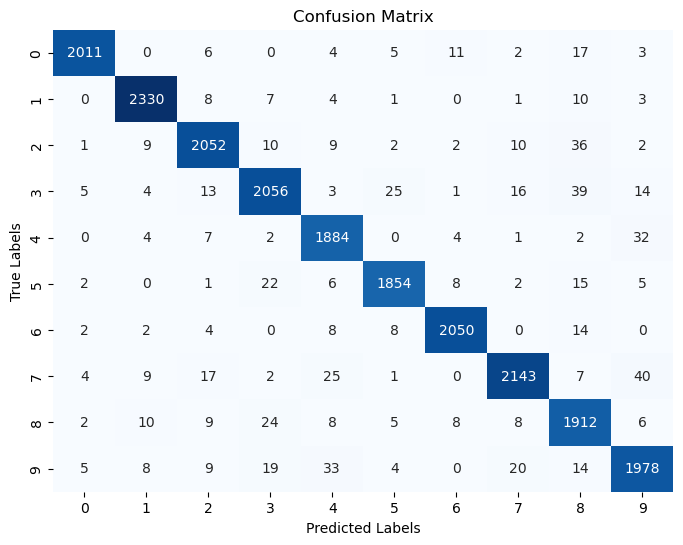


Ratio 80:19
SVM (Polynomial Kernel, PCA) Training Accuracy: 0.98
SVM (Polynomial Kernel, PCA) Testing Accuracy: 0.97
Classification Report (Testing Data):
               precision    recall  f1-score   support

           0       0.99      0.98      0.98      1343
           1       0.98      0.99      0.98      1600
           2       0.96      0.96      0.96      1380
           3       0.96      0.95      0.96      1433
           4       0.95      0.98      0.96      1295
           5       0.97      0.97      0.97      1273
           6       0.98      0.98      0.98      1396
           7       0.98      0.95      0.96      1503
           8       0.92      0.96      0.94      1357
           9       0.94      0.94      0.94      1420

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000

Confusion Matrix (Testing Data):
 [[1311    0    5    0    1    3    6    2   12    

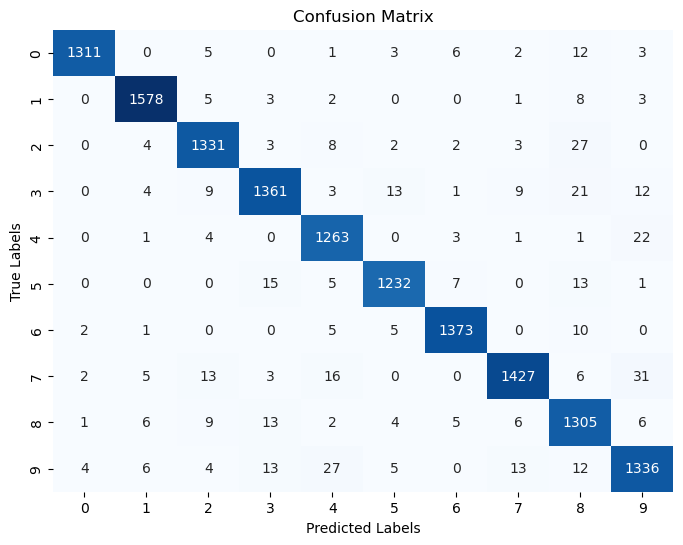


Ratio 90:9
SVM (Polynomial Kernel, PCA) Training Accuracy: 0.98
SVM (Polynomial Kernel, PCA) Testing Accuracy: 0.97
Classification Report (Testing Data):
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       683
           1       0.98      0.99      0.98       800
           2       0.96      0.97      0.96       674
           3       0.96      0.94      0.95       760
           4       0.95      0.98      0.96       611
           5       0.98      0.97      0.97       658
           6       0.98      0.99      0.98       677
           7       0.98      0.94      0.96       724
           8       0.94      0.96      0.95       693
           9       0.95      0.95      0.95       720

    accuracy                           0.97      7000
   macro avg       0.97      0.97      0.97      7000
weighted avg       0.97      0.97      0.97      7000

Confusion Matrix (Testing Data):
 [[672   0   3   0   0   1   2   0   4   1]
 [  0 79

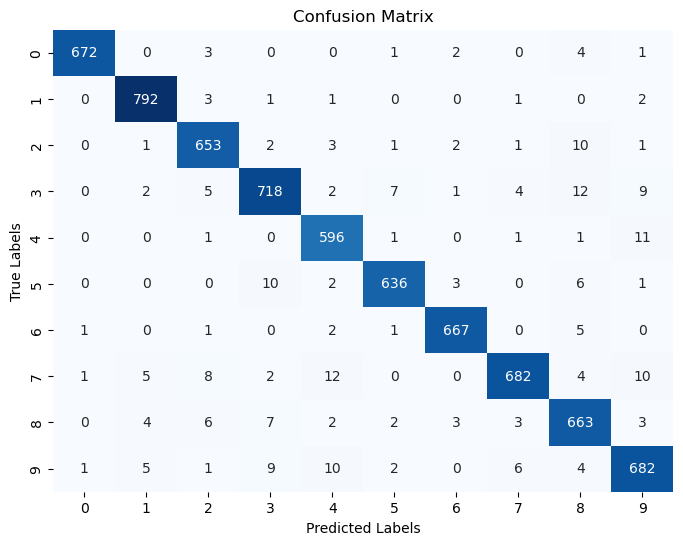

In [19]:
import seaborn as sns
for ratio in ratios:
    print(f"Ratio {int(ratio * 100)}:{int((1 - ratio) * 100)}")

    # For PCA-transformed features
    X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=1 - ratio, random_state=42)

    # Fit and evaluate SVM with polynomial kernel on PCA-transformed features
    svm_classifier.fit(X_train_pca, y_train)
    y_train_pred = svm_classifier.predict(X_train_pca)
    y_test_pred = svm_classifier.predict(X_test_pca)

    # Training accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    print(f"SVM (Polynomial Kernel, PCA) Training Accuracy: {train_accuracy:.2f}")

    # Testing accuracy
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f"SVM (Polynomial Kernel, PCA) Testing Accuracy: {test_accuracy:.2f}")

    # Classification report for testing data
    report = classification_report(y_test, y_test_pred)
    print("Classification Report (Testing Data):\n", report)

    # Confusion matrix for testing data
    confusion = confusion_matrix(y_test, y_test_pred)
    print("Confusion Matrix (Testing Data):\n", confusion)

    print()

    # Visualize the confusion matrix as a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix")
    plt.show()
    
    print()

ValueError: cannot reshape array of size 50 into shape (50,50)

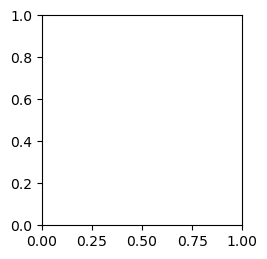

In [21]:
# Display images along with predicted labels
num_images_to_display = 10  # You can change this number

plt.figure(figsize=(15, 6))
for i in range(num_images_to_display):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test_pca[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_test[i]}\nPredicted: {y_test_pred[i]}", fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Define the ratios for train-test splits
ratios = [0.7, 0.8, 0.9]

for ratio in ratios:
    # Split the original data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - ratio, random_state=42)

    # Initialize Gaussian Naive Bayes classifier
    nb_classifier = GaussianNB()

    # Train the Naive Bayes classifier on the training data
    nb_classifier.fit(X_train, y_train)

    # Make predictions on the training and testing data
    y_train_pred = nb_classifier.predict(X_train)
    y_test_pred = nb_classifier.predict(X_test)

    # Calculate accuracy scores for train and test
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Print the accuracy scores for train and test for the current ratio
    print(f"Ratio {int(ratio * 100)}:{int((1 - ratio) * 100)}")
    print(f"Train Accuracy:", train_accuracy)
    print(f"Test Accuracy:", test_accuracy)
    print()


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Define the ratios for train-test splits
ratios = [0.7, 0.8, 0.9]

for ratio in ratios:
    # Split the PCA-extracted features and labels into training and testing sets
    X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=1 - ratio, random_state=42)

    # Initialize Gaussian Naive Bayes classifier
    nb_classifier = GaussianNB()

    # Train the Naive Bayes classifier on the training data
    nb_classifier.fit(X_train_pca, y_train)

    # Make predictions on both training and testing data
    y_train_pred = nb_classifier.predict(X_train_pca)
    y_test_pred = nb_classifier.predict(X_test_pca)

    # Calculate accuracy scores for train and test data
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Print the accuracy scores for both train and test data for the current ratio
    print(f"Ratio {int(ratio * 100)}:{int((1 - ratio) * 100)}")
    print(f"Train Accuracy:", train_accuracy)
    print(f"Test Accuracy:", test_accuracy)
    print()

ORI EKA

In [10]:
from sklearn.model_selection import train_test_split

# Langkah 4: Membagi Data Menjadi Data Pelatihan dan Data Pengujian (Contoh dengan rasio 70:30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Cek jumlah data pelatihan dan pengujian
print("Jumlah data pelatihan:", len(X_train))
print("Jumlah data pengujian:", len(X_test))

Jumlah data pelatihan: 49000
Jumlah data pengujian: 21000


In [11]:
from sklearn.naive_bayes import GaussianNB

# Inisialisasi model Naive Bayes
naive_bayes_model = GaussianNB()

# Melatih model pada data pelatihan
naive_bayes_model.fit(X_train, y_train)

# Menguji kinerja model pada data pengujian
y_pred_nb = naive_bayes_model.predict(X_test)

# Mengukur akurasi
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Akurasi Naive Bayes:", accuracy_nb)

# Menampilkan laporan klasifikasi
print("Laporan Klasifikasi Naive Bayes:")
print(classification_report(y_test, y_pred_nb))

# Menampilkan confusion matrix
print("Confusion Matrix Naive Bayes:")
print(confusion_matrix(y_test, y_pred_nb))

Akurasi Naive Bayes: 0.550952380952381
Laporan Klasifikasi Naive Bayes:
              precision    recall  f1-score   support

           0       0.64      0.92      0.75      2058
           1       0.79      0.95      0.86      2364
           2       0.86      0.31      0.45      2133
           3       0.75      0.34      0.47      2176
           4       0.86      0.13      0.23      1936
           5       0.55      0.04      0.07      1915
           6       0.61      0.95      0.74      2088
           7       0.90      0.29      0.44      2248
           8       0.30      0.56      0.39      1992
           9       0.37      0.94      0.53      2090

    accuracy                           0.55     21000
   macro avg       0.66      0.54      0.49     21000
weighted avg       0.67      0.55      0.50     21000

Confusion Matrix Naive Bayes:
[[1885    3   12    7    5    5   76    2   39   24]
 [   2 2249    4    9    1    6   28    1   51   13]
 [ 252   60  652  131    5    9  

In [14]:
# Ambil subset data pelatihan
subset_size = 10000  # Misalnya, kita ambil 10.000 data pertama
X_train_subset = X_train[:subset_size]
y_train_subset = y_train[:subset_size]

# Inisialisasi model SVM
svm_model = SVC(kernel='linear', C=1)

# Latih model pada subset data pelatihan
svm_model.fit(X_train_subset, y_train_subset)

# Evaluasi model pada data pengujian
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi SVM pada subset data pelatihan:", accuracy)


Akurasi SVM pada subset data pelatihan: 0.9062380952380953


In [ ]:
import random

# Display random samples of testing data images along with their predicted labels
sample_indices = random.sample(range(len(X_test)), 24)  # Use original test data
    
    # Get predicted names (for adaptation)
predicted_names = [str(label) for label in y_test_pred]
    
    # Create subplots
fig, ax = plt.subplots(4, 6)
    
for i, axi in enumerate(ax.flat):
    axi.imshow(X_test[sample_indices[i]].reshape(28, 28), cmap='gray')  # Reshape to (28, 28) for original image dimensions
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(predicted_names[sample_indices[i]], color='black' if y_test_pred[sample_indices[i]] == y_test[sample_indices[i]] else 'red')
    
fig.suptitle('Predicted Labels; Incorrect Labels in Red', size=14)
plt.show()
    
print()

c:\Users\ACER\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


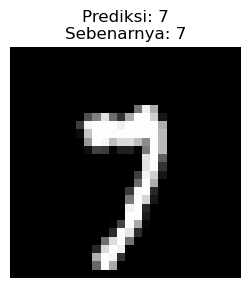

c:\Users\ACER\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


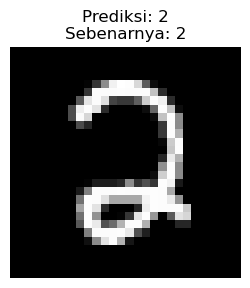

c:\Users\ACER\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


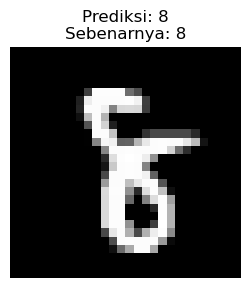

c:\Users\ACER\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


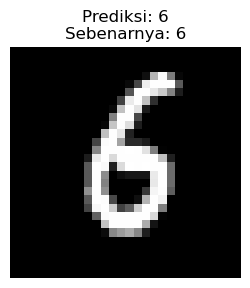

c:\Users\ACER\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


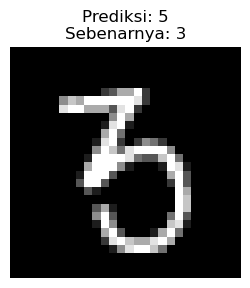

c:\Users\ACER\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


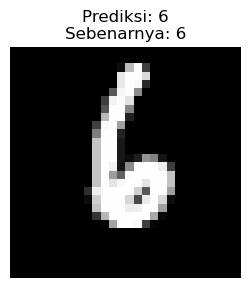

c:\Users\ACER\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


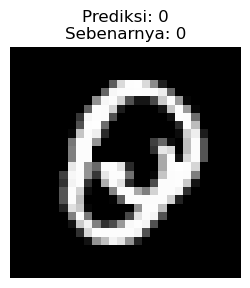

c:\Users\ACER\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


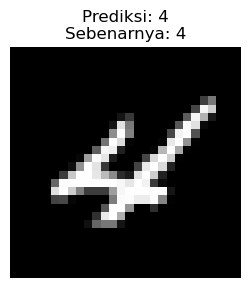

c:\Users\ACER\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


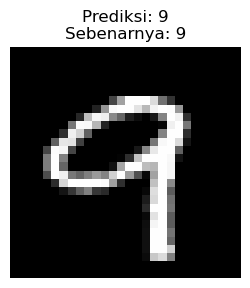

c:\Users\ACER\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


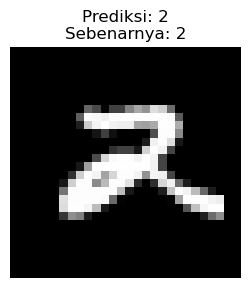

In [15]:
import matplotlib.pyplot as plt
import random

sample_indices = random.sample(range(len(X_test)), 10)

for index in sample_indices:
    image = X_test.iloc[index].values.reshape(28, 28)
    
    predicted_label = svm_model.predict([X_test.iloc[index]])[0]
    
    true_label = y_test.iloc[index]
    
    # Menampilkan gambar dan label prediksi
    plt.figure(figsize=(3, 3))
    plt.imshow(image, cmap='gray')
    plt.title(f"Prediksi: {predicted_label}\nSebenarnya: {true_label}")
    plt.axis('off')
    plt.show()


In [ ]:
# Ambil subset data pelatihan
subset_size = 30000  # Misalnya, kita ambil 10.000 data pertama
X_train_subset = X_train[:subset_size]
y_train_subset = y_train[:subset_size]

# Inisialisasi model SVM
svm_model = SVC(kernel='linear', C=1)

# Latih model pada subset data pelatihan
svm_model.fit(X_train_subset, y_train_subset)

# Evaluasi model pada data pengujian
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi SVM pada subset data pelatihan:", accuracy)


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Define the classifiers
naive_bayes_classifier = GaussianNB()
svm_classifier = SVC(kernel='poly', degree=3)  # Polynomial kernel with degree 3

# Loop through the different ratios
for ratio in ratios:
    print(f"Ratio {int(ratio * 100)}:{int((1 - ratio) * 100)}")
    
    # For original pixel values
    X_train_orig, X_test_orig, _, _ = train_test_split(X_original, y, test_size=1 - ratio, random_state=42)
    
    # For PCA-transformed features
    X_train_pca, X_test_pca, _, _ = train_test_split(X_pca, y, test_size=1 - ratio, random_state=42)
    
    # Fit and evaluate SVM with polynomial kernel on original pixel values
    svm_classifier.fit(X_train_orig, y_train)
    y_pred = svm_classifier.predict(X_test_orig)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"SVM (Polynomial Kernel, Original Pixels) Accuracy: {accuracy:.2f}")
    
    # Fit and evaluate SVM with polynomial kernel on PCA-transformed features
    svm_classifier.fit(X_train_pca, y_train)
    y_pred = svm_classifier.predict(X_test_pca)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"SVM (Polynomial Kernel, PCA) Accuracy: {accuracy:.2f}")
    
    print()